In [14]:
""" Import Packages """
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
import cv2


from spectral import *
import spectral.io.aviris as aviris

In [55]:
""" Reading in Image """
img_path = "/Users/ashleylieber/Downloads/0_14.png"   # Red laser
#img_path = "/Users/ashleylieber/Downloads/0_21.png"   # Green laser
#img_path = "/Users/ashleylieber/Downloads/0_29.png"    # Lightbulb (not sure if white LED or incandescent)


(254, 1157, 4)


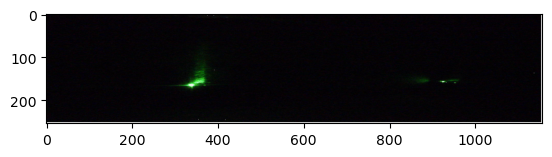

In [16]:
img = iio.imread(img_path)
print(img.shape)
#print(img)
plt.imshow(img)
plt.show()

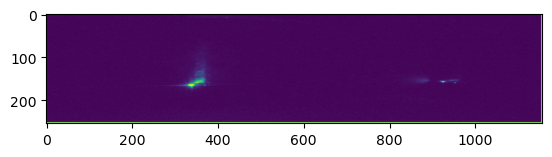

In [18]:
from PIL import Image

# Load the PNG image
image = Image.open(img_path)

# Convert the image to grayscale
image_gray = image.convert('L')
plt.imshow(image_gray)

# One method to spectrum extraction

Estimating the intensity values of a spectrum from an RGBA PNG image by comparing the brightness of different regions in the image in Python involves several steps. Here is a general approach that you can follow:

1. Load the RGBA PNG image using a suitable Python library such as Pillow or OpenCV.
2. Convert the image to grayscale to simplify the analysis. You can do this using the convert() method in Pillow or the cvtColor() function in OpenCV.
3. Divide the grayscale image into regions that correspond to different wavelengths or frequency ranges in the spectrum. The number and size of these regions will depend on the characteristics of the spectrum and the resolution of the image.
4. Calculate the average brightness value for each region by computing the mean pixel value within the region. You can use the mean() method in NumPy to do this.
5. Normalize the brightness values by dividing each value by the maximum brightness value in the image. This will give you intensity values that are scaled between 0 and 1.
6. Plot the intensity values against the wavelength or frequency axis to generate the spectrum.

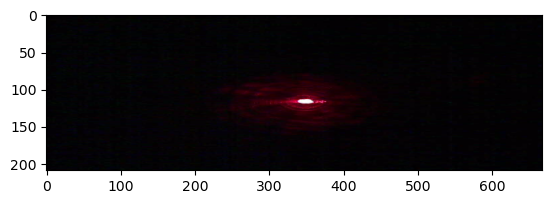

In [56]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the RGBA PNG image
img = Image.open(img_path)
plt.imshow(img)

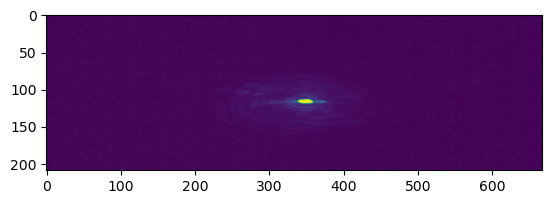

In [57]:
# Convert the image to grayscale
gray_img = img.convert('L')
plt.imshow(gray_img)

In [58]:
# Divide the image into regions
num_regions = 100
region_size = gray_img.width // num_regions
regions = [gray_img.crop((i*region_size, 0, (i+1)*region_size, gray_img.height)) for i in range(num_regions)]

# Calculate the average brightness value for each region
brightness_values = [np.mean(np.asarray(region)) for region in regions]

# Normalize the brightness values
max_brightness = max(brightness_values)
intensity_values = [brightness / max_brightness for brightness in brightness_values]

In [59]:
print(num_regions)
print(intensity_values)

100
[0.18006518196632265, 0.19630635524171647, 0.2280825638240087, 0.24008690928843018, 0.24600760456273765, 0.25567626290059753, 0.2605105920695274, 0.24378055404671375, 0.2483976099945682, 0.2643671917436176, 0.2155893536121673, 0.2582835415535035, 0.2579576317218903, 0.26186854970124934, 0.277729494839761, 0.20825638240086908, 0.24095600217273222, 0.233623030961434, 0.29163498098859314, 0.26382400869092887, 0.2608908202064096, 0.2510592069527431, 0.22797392721347096, 0.22303096143400325, 0.21732753938077132, 0.263335143943509, 0.27593699076588807, 0.26996197718631176, 0.23921781640412818, 0.26224877783813144, 0.26338946224877785, 0.2608908202064096, 0.2619228680065182, 0.2728408473655622, 0.2224877783813145, 0.23867463335143946, 0.2771319934818034, 0.2577403585008148, 0.29326453014665943, 0.3020097772949484, 0.31558935361216733, 0.2838131450298751, 0.31857686040195543, 0.38370450841933734, 0.365942422596415, 0.38967952199891365, 0.4139598044541011, 0.43742531233025533, 0.43900054318

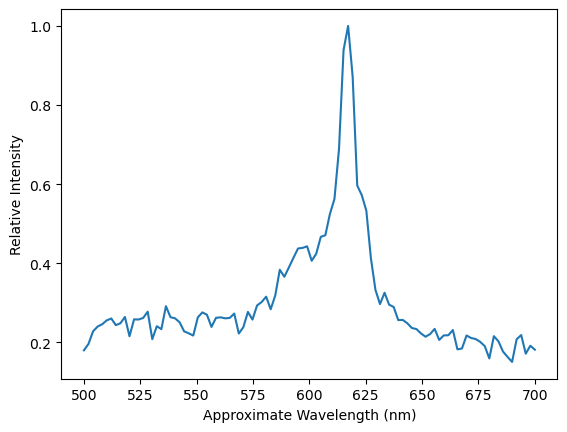

In [71]:
# Plot the spectrum
wavelengths = np.linspace(500, 700, num_regions)
plt.plot(wavelengths, intensity_values)
plt.xlabel('Approximate Wavelength (nm)')
plt.ylabel('Relative Intensity')
plt.show()

In [72]:
len(intensity_values)

100

In [73]:
intensity_values_np = np.array(intensity_values)

In [74]:
intensity_values_np[0:99].argmax()

58

In [76]:
# Estimated wavelengths of the peak
wavelengths[58]

617.1717171717172